In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv('/home/wings/Downloads/homogeneous-150/hypothesis', header=None, delimiter=' ')

In [9]:
%%time

X_dist = []
Y_signal = []

for i in range(len(data)):
    x_t = data.iat[i, 0]
    y_t = data.iat[i, 1]
    x_s = data.iat[i, 2]
    y_s = data.iat[i, 3]
    dist = math.sqrt((x_t-x_s)**2 + (y_t-y_s)**2)
    if dist in X_dist:
        continue
    signal = data.iloc[i, 4]
    X_dist.append(dist)
    Y_signal.append(signal)

CPU times: user 20.8 s, sys: 3.96 ms, total: 20.8 s
Wall time: 20.8 s


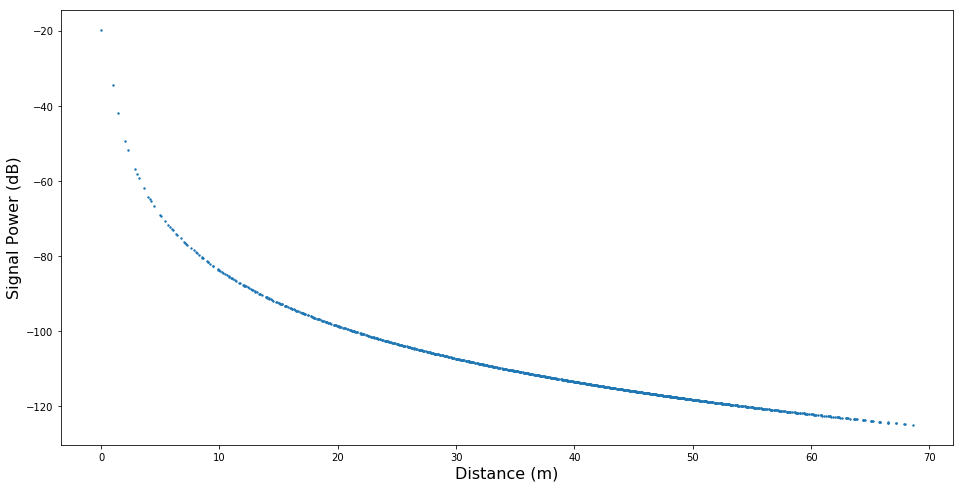

In [11]:
plt.figure(figsize=(16, 8))
plt.scatter(X_dist, Y_signal, s=2)
plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()

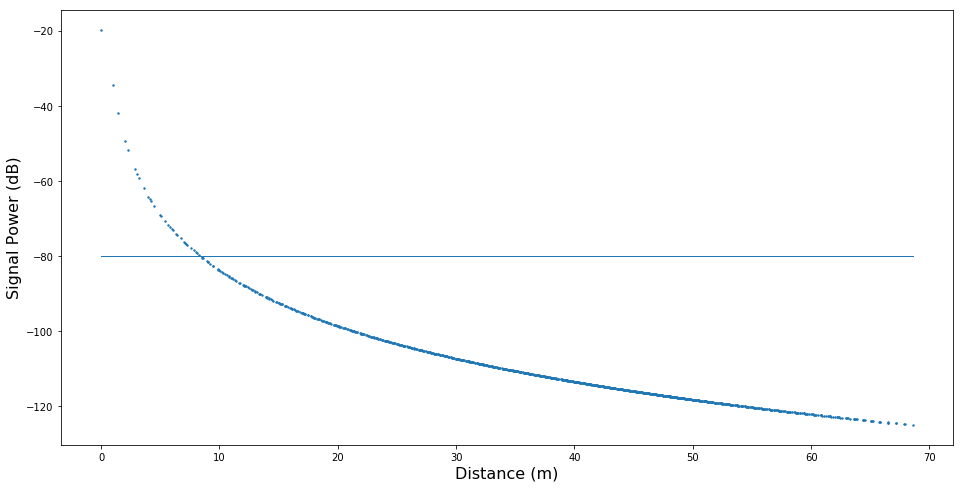

In [12]:
Y_80 = [-80] * len(X_dist)

plt.figure(figsize=(16, 8))
plt.scatter(X_dist, Y_signal, s=2)
plt.plot(X_dist, Y_80, linewidth=1)

plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()

In [14]:
for dist, sig in zip(X_dist, Y_signal):
    if dist >= 18 and dist <= 19:
        print(dist, sig)

18.027756377319946 -96.4491142055408
18.24828759089466 -96.70930707691734
18.35755975068582 -96.83706864947693
18.788294228055936 -97.333385077579
18.384776310850235 -96.8687720936332
18.973665961010276 -97.54348813114092
18.601075237738275 -97.1190736728103
18.681541692269406 -97.21144752343812
18.110770276274835 -96.54742948751478
18.439088914585774 -96.93189855741143
18.867962264113206 -97.4239348809564
19.0 -97.57316888408332
18.0 -96.41614066765943


/home/wings/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/wings/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


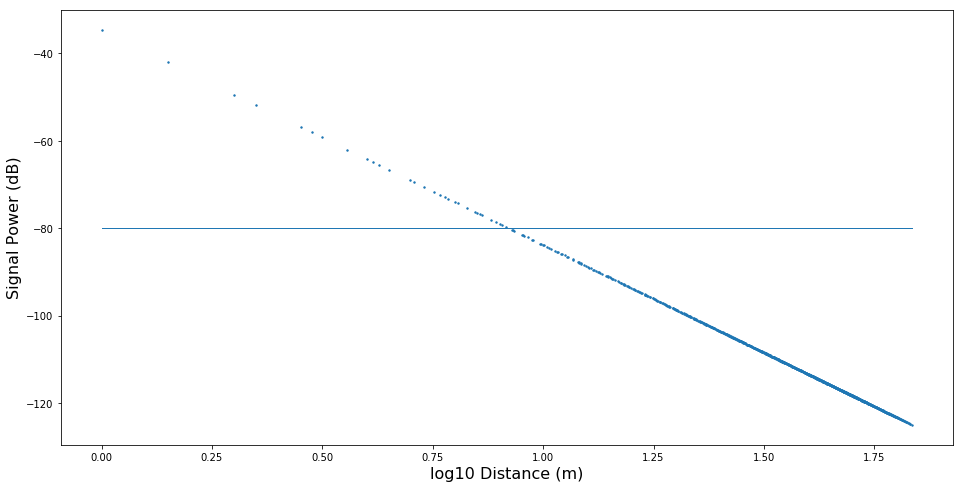

In [32]:
plt.figure(figsize=(16, 8))
plt.scatter(np.log10(X_dist), Y_signal, s=2)
plt.plot(np.log10(X_dist), Y_80, linewidth=1)
plt.xlabel('log10 Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()